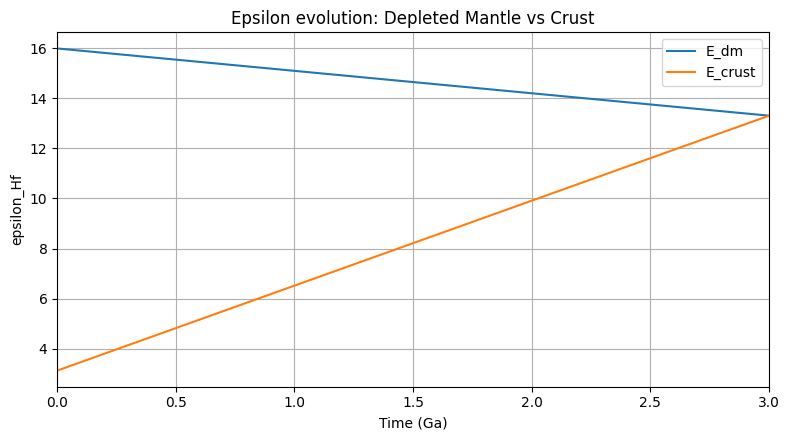

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def eHF_DM(e, m, t):
    x = e - (m*t)
    return x

def eHF_crust(e, mDM, mcrust, t, s):
    x = eHF_DM(e, mDM, s) - (mcrust * (t - s))
    return x

lambda_1 = 1.867E-2  # Ga^-1

lu_depleted = float(input("Lu/Hf ratio (Depleted Mantle): "))
lu_chur     = float(input("Lu/Hf ratio (CHUR): "))
lu_crust    = float(input("Lu/Hf ratio (Crust): "))

ts    = float(input("Time of separation (Ga): "))

e_DM_0    = float(input("eHfDM(0) value: "))

n = int(round((ts - 0) / 0.01)) + 1     # number of points so step ≈ 0.01
t = np.linspace(0, ts, n)
# print(t)
age_Ga = ts - t

m_DM     = lambda_1 * (lu_depleted - lu_chur) * 10000
m_crust  = lambda_1 * (lu_crust - lu_chur) * 10000

E_dm = eHF_DM(e_DM_0, m_DM, t)
E_crust = eHF_crust(e_DM_0, m_DM, m_crust, t, ts)


t_plot = t[::-1]
# print(t_plot)
E_dm_plot = E_dm[::-1]
E_crust_plot = E_crust[::-1]

plt.figure(figsize=(8, 4.5))
plt.plot(t_plot, E_dm_plot, label="E_dm", color="C0")
plt.plot(t_plot, E_crust_plot, label="E_crust", color="C1")
plt.xlabel("Time (Ga)")
plt.ylabel("epsilon_Hf")
plt.title("Epsilon evolution: Depleted Mantle vs Crust")
plt.legend()
plt.grid(True)
plt.xlim(0, t_plot.max())
plt.tight_layout()
plt.show()





In [16]:
sample_e = float(input("Epsilon value of sample: "))
sample_t = float(input("Age value of sample: "))

c_DM = eHF_DM(e_DM_0, m_DM, 0)
c_crust = eHF_crust(e_DM_0, m_DM, m_crust, 0, ts)

print(f"Epsilon value of Depleted Mantle at time {ts} Ga: {c_DM}")
print(f"Epsilon value of Crust at time {ts} Ga: {c_crust}")

alpha_crust = (-(m_DM * sample_t) - sample_e + c_DM)/(-(m_DM * sample_t) + c_DM - c_crust + (m_crust * sample_t))

print(f"Crustal contribution (alpha) to the sample: {alpha_crust}")

Epsilon value of Depleted Mantle at time 3.0 Ga: 16.0
Epsilon value of Crust at time 3.0 Ga: 3.117700000000003
Crustal contribution (alpha) to the sample: 0.048364034372743996


    Time (Ga)  epsilon Hf  alpha_crust
0        0.00        6.21     0.759957
1        0.06       12.13     0.302284
2        0.07        9.11     0.542634
3        0.14       11.65     0.343986
4        0.17       13.92     0.158624
..        ...         ...          ...
95       2.57       11.96     0.940646
96       2.60       11.97     0.989721
97       2.63       11.82     1.147457
98       2.65       11.88     1.161179
99       2.70       11.77     1.405314

[100 rows x 3 columns]


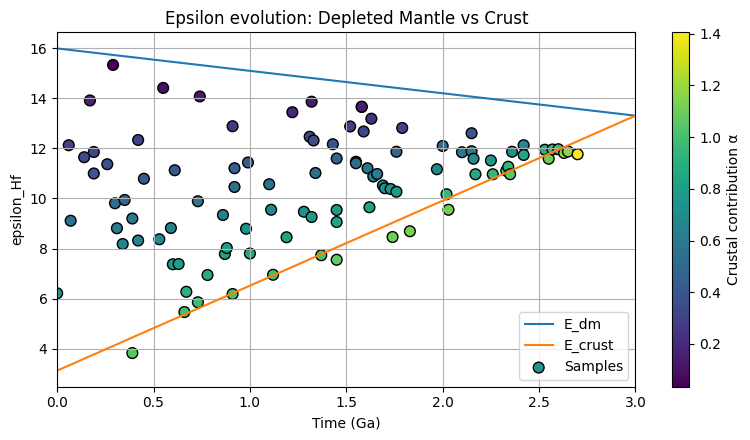

In [28]:
import pandas as pd

def alpha_crust(sample_e, sample_t, m_DM, m_crust, c_DM, c_crust):
    """
    Compute crustal contribution alpha for one sample
    """
    numerator = (-(m_DM * sample_t) - sample_e + c_DM)
    denominator = (-(m_DM * sample_t) + c_DM - c_crust + (m_crust * sample_t))
    return numerator / denominator

    return num / den

# ===== Read sample data from Excel =====
df = pd.read_excel("samples.xlsx")

sample_t = df["Time (Ga)"].values
sample_e = df["epsilon Hf"].values

# ===== Compute crustal contribution =====
alpha_vals = alpha_crust_array(
    sample_e,
    sample_t,
    e_DM_0,
    m_DM,
    m_crust,
    ts
)

df["alpha_crust"] = alpha_vals

import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(8, 4.5))

# Plot the lines
plt.plot(t_plot, E_dm_plot, label="E_dm", color="C0")
plt.plot(t_plot, E_crust_plot, label="E_crust", color="C1")

# Add the scatter points on the same axes
sc = plt.scatter(
    sample_t,
    sample_e,
    c=alpha_vals,
    cmap="viridis",
    edgecolor="k",
    s=60,
    label="Samples"
)

# Add labels, title, legend, etc.
plt.xlabel("Time (Ga)")
plt.ylabel("epsilon_Hf")
plt.title("Epsilon evolution: Depleted Mantle vs Crust")
plt.legend()
plt.grid(True)
plt.xlim(0, t_plot.max())

# Add the colorbar referencing the scatter
plt.colorbar(sc, label="Crustal contribution α")

plt.tight_layout()

# Optionally show the plot (uncomment if needed)
# plt.show()

print(df)


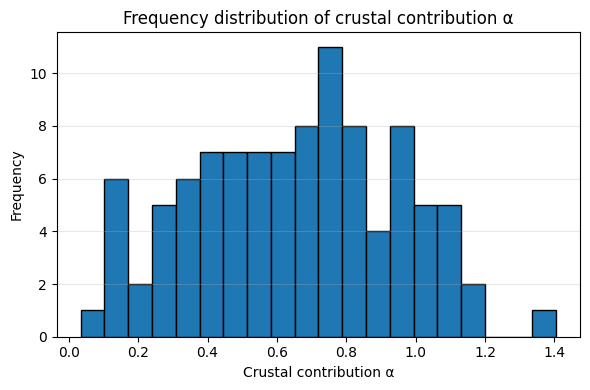

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.hist(
    alpha_vals,
    bins=20,
    edgecolor="black"
)

plt.xlabel("Crustal contribution α")
plt.ylabel("Frequency")
plt.title("Frequency distribution of crustal contribution α")
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()
